In [13]:
import sys, os
import imp
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(0,'./lib')
import time_analysis_LSST as timean
import timeit
from time_analysis_LSST import (FileManager, MemoryReader, FilterList, Simulation, Sim0404)
from correlations import CorrelateTwoShears

In [14]:
path = "/global/cscratch1/sd/cramirez/CoLoRe_LSST/"

In [15]:
filt = {
    "status" : ["done"],
    "template": ["master_with_shear"],
    "factor" : [0.1,0.01]
}

sims= {}
for i,sim in enumerate(FileManager.get_simulations(path,filt)):
    simname = i
    sims[simname] = Sim0404(sim,simname)
    print(f'Id: { simname }\tLocation: { sims[simname].location }')

Id: 0	Location: /global/cscratch1/sd/cramirez/CoLoRe_LSST/New/shear_20/nside_512/0.01/20200522145442
Id: 1	Location: /global/cscratch1/sd/cramirez/CoLoRe_LSST/New/shear_20/nside_512/0.1/20200521010157
Id: 2	Location: /global/cscratch1/sd/cramirez/CoLoRe_LSST/New/shear_5/nside_512/0.01/20200522152308
Id: 3	Location: /global/cscratch1/sd/cramirez/CoLoRe_LSST/master/0.01/20200416090110
Id: 4	Location: /global/cscratch1/sd/cramirez/CoLoRe_LSST/Old/shear_5/nside_512/0.01/202004150834
Id: 5	Location: /global/cscratch1/sd/cramirez/CoLoRe_LSST/Old/shear_5/nside_512/0.1/202004150835


In [20]:
new = sims[2]
old = sims[4]
master = sims[3]

In [ ]:
new.set_shear_reader()
old.set_shear_reader()
master.set_shear_reader()

sr

In [16]:
x = sims[2]
y = sims[
m = sims[3]

In [17]:
x.set_shear_reader()
y.set_shear_reader()
srx = x.shear_reader
sry = y.shear_reader

In [6]:
xshear = srx.get_values('mp_e1', source=2)
yshear = sry.get_values('mp_e1', source=2)

In [7]:
xshear

array([-0.00358368,  0.00607014, -0.00125513, ...,  0.0035848 ,
       -0.0003638 ,  0.00733544])

In [8]:
yshear

array([-0.00315624,  0.00558685, -0.00117125, ...,  0.00360427,
       -0.000988  ,  0.00704633])

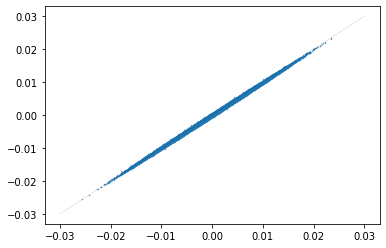

In [9]:
plt.scatter(xshear, yshear, s=0.1)
a = np.linspace(-0.03,0.03,100)
b = a
plt.plot(a,b,'-k', lw=0.1)

In [18]:
corsims = CorrelateTwoShears([x],[y])

In [19]:
corsims.correlation_in_bin('mp_e1',source=2, minz=0.8, maxz=0.9)

0.994681579897171

In [12]:
corsims.correlation_in_bin('mp_e1',source=2, minz=1.5, maxz=2)

0.9997769548284479

In [14]:
corsims.regression_in_bin('mp_e1', source=2, minz=1, maxz=1.5)

(0.9940408835604522, 9.538994784714987e-08)

In [12]:
xshear = srx.get_values('mp_e1', source=2, minz=1, maxz=1.5)

In [13]:
yshear = sry.get_values('mp_e1', source=2, minz=1, maxz=1.5)

In [14]:
xshear

array([-0.00339203,  0.00660518, -0.00108561, ...,  0.00398858,
       -0.00059953,  0.00803233])

In [15]:
yshear

array([-0.00287109,  0.00645723, -0.00106647, ...,  0.00387812,
       -0.00084866,  0.00757581])

In [49]:
_ = np.corrcoef(xshear,yshear)[0][1]

In [51]:
correlations =[]
correlations.append(_)

In [50]:
_

0.9997769548284479

garbage

In [23]:
minz = 1
maxz = 2
bins = 4
step = (maxz-minz)/bins
for b in range(bins):
    print(minz + b*step)

1.0
1.25
1.5
1.75


In [25]:
np.linspace(minz,maxz,bins+1)

array([1.  , 1.25, 1.5 , 1.75, 2.  ])